# Confidence Intervals

In [1]:
# Libraries

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
from scipy.stats import norm
from scipy.stats import t

## Challenge 1
We want to estimate the average size of the men of a country with a confidence level of 80%. Assuming that the standard deviation of the sizes in the population is 4, get the confidence interval with a sample of men selected randomly, whose heights are:

````
heights = [167, 167, 168, 168, 168, 169, 171, 172, 173, 175, 175, 175, 177, 182, 195]
````

**Hint**: function `stats.norm.interval` from `scipy` can help you get through this exercise. 

In [51]:
# your code here
heights = [167, 167, 168, 168, 168, 169, 171, 172, 173, 175, 175, 175, 177, 182, 195]

#mean
x_bar = np.mean(heights)

#standard_error = np.std(heights)/np.sqrt(len(heights)) - we know the std deviation so this is not applied

conf_interval = stats.norm.interval(0.80, loc = x_bar, scale = 4)
conf_interval

(168.34046040448825, 178.59287292884508)

In [53]:
print("The lower boundary of the confidence interval is at ", conf_interval[0])
print("The upper boundary of the confidence interval is at ", conf_interval[1])

The lower boundary of the confidence interval is at  168.34046040448825
The upper boundary of the confidence interval is at  178.59287292884508


## Challenge 2 
In a sample of 105 shops selected randomly from an area, we note that 27 of them have had losses in this month. Get an interval for the proportion of businesses in the area with losses to a confidence level of 80% and a confidence level of 90%.

**Hint**: function `stats.norm.interval` from `scipy` can help you get through this exercise. 

In [32]:
# your code here

sample_size = 105 #n
sample_losses = 27
mean_losses = sample_losses/sample_size #p for the formula of calculating the std deviation
#std = (p * (1 - p) / n)**0.5

std_sample = (mean_losses * (1 - mean_losses) / sample_size)**0.5

In [33]:
std_sample

0.042652572988124506

In [37]:
# using: stats.norm.interval(confidence_level, loc = mean, scale = std deviation)
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html

confidence_interval_80 = stats.norm.interval(0.80, loc = mean_losses, scale = std_sample)
print("The lower boundary of the confidence interval for 80% is at ", confidence_interval_80[0], "and the upper at ", confidence_interval_80[1])


The lower boundary of the confidence interval for 80% is at  0.20248138545542083 and the upper at  0.3118043288302934


In [38]:
confidence_interval_90 = stats.norm.interval(0.90, loc = mean_losses, scale = std_sample)
print("The lower boundary of the confidence interval for 90% is at ", confidence_interval_90[0], "and the upper at ", confidence_interval_90[1])


The lower boundary of the confidence interval for 90% is at  0.1869856177645281 and the upper at  0.3273000965211861


## Bonus Challenge
The error level or sampling error for the first challenge is given by the following expression:
$$Error = z_{\frac{\alpha}{2}}\frac{\sigma}{\sqrt n}$$
Where z represents the value for N(0,1)


Suppose that with the previous data of challenge 1, and with a confidence level of
99% (that is, almost certainly) we want to estimate the average population size, so that the error level committed is not greater than half a centimeter.

#### 1.- Determine what size the selected sample of men should be.

In [68]:
# your code here
'''
dismantling the formula: 
error = 0.5
std = 4 -> sigma
n = ? --> size of the selected sample
z = upper boundary interval for the confidence interval for 99


error/z = σ/√n
√n = (z * σ)/error
n = ((z * σ)/error)**2
'''
std = 4
err = 0.5
conf_interv_99 = stats.norm.interval(0.99)

'''
NOTES FOR MY FUTURE-SELF
we dont use the mean/std deviation --> stats.norm.interval(0.99, loc = x_bar, scale = 4) 
because z distributions are centered in zero -> 60 - Sampling and Confidence Intervals Lesson Notes 
'''

conf_interv_99 #the z table from the handbook points to 2.58

(-2.5758293035489004, 2.5758293035489004)

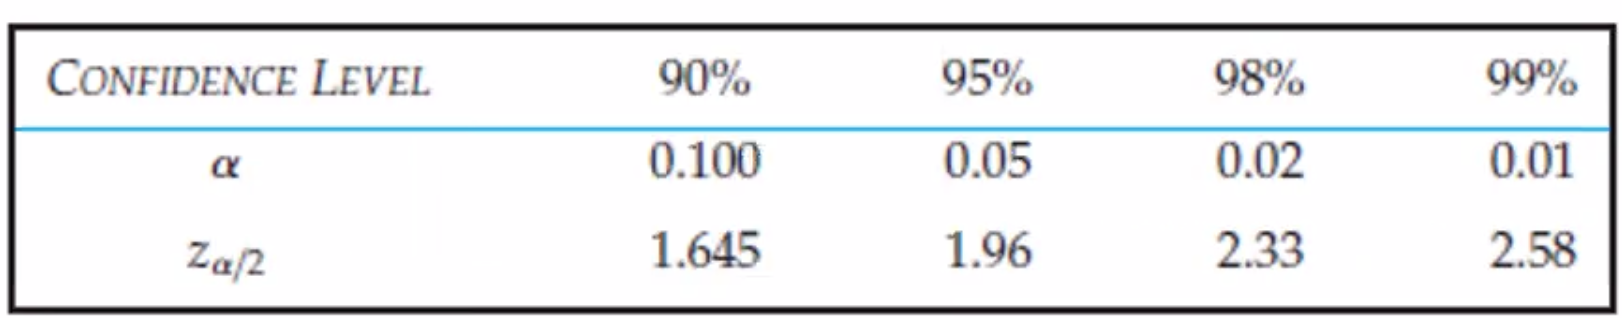

In [69]:
z = conf_interv_99[1]
z

2.5758293035489004

In [70]:
n = ((z*std)/err)**2
n

424.63338246535767

#### 2.- For the second challenge, we have the following error:
$$ Error = z_{\frac{\alpha}{2}}\sqrt{\frac{p\times q}{n}} $$
#### Determine the sample size required to not exceed an error of 1% with a confidence of 80%.

In [71]:
# your code here
'''
dismantling the formula: 
error = 0.01
n = ?  --> Sample size required 
z = upper boundary interval for the confidence interval for 80


error/z = sqr((p*q)/n)
(error/z)**2 = (p*q)/n
n = ((p*q)*(z**2))/(error**2)
'''

confidence_80 = stats.norm.interval(0.8)
confidence_80

(-1.2815515655446004, 1.2815515655446004)

In [74]:
z = confidence_80[1]
error = 0.01
p = mean_losses
# p + 
q = 1 -p
n = ((p*q)*(z**2))/(error**2)
n

3137.27031138822

## Bonus Challenge

Let's consider the following problem:

Build a confidence interval of 94% for the real difference between the durations of two brands of spotlights, if a sample of 40 spotlights taken randomly from the first mark gave an average duration of 418 hours, and a sample of 50 bulbs of another brand gave a duration average of 402 hours. The standard deviations of the two
populations are 26 hours and 22 hours, respectively.

Sometimes, we will be interested in the difference of two different groups of random variables. We can also build a confidence interval for that! We have some different cases regarding the variance but for this specific case (the variance are different and known), we have that:

$$\overline{X} - \overline{Y}  \sim N(\mu_{X} - \mu_{Y} , \sqrt{\frac{\sigma_{X}^2}{n_X}+\frac{\sigma_{Y}^2}{n_Y}})$$

Solve the problem with this information.

In [ ]:
# your code here